In [185]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [93]:
# import warnings filter
import warnings
from warnings import simplefilter
from sklearn.exceptions import DataConversionWarning
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [94]:
# open csv file and load the data into pandas dataframe
df_users = pd.read_csv('takehome_users.csv', low_memory=False, encoding='latin-1')
df_users.info()

# open csv file and load the data into pandas dataframe
df_usersEng = pd.read_csv('takehome_user_engagement.csv', low_memory=False, encoding='latin-1')
#df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [95]:
df_users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [96]:
df_users.head(5).T

,0,1,2,3,4
object_id,1,2,3,4,5
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28,2013-01-17 10:14:20
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas,Raw Grace
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com,GraceRaw@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE,GUEST_INVITE
last_session_creation_time,1.39814e+09,1.39624e+09,1.36373e+09,1.36921e+09,1.35885e+09
opted_in_to_mailing_list,1,0,0,0,0
enabled_for_marketing_drip,0,0,0,0,0
org_id,11,1,94,1,193
invited_by_user_id,10803,316,1525,5151,5240


In [97]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [98]:
df_users.shape

(12000, 10)

In [99]:
df_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [100]:
#There are 12000 records
# Out of 10 columns - two columns have null values
#We will look at the null percentage for these columns next

In [101]:
# we will calculate the percentage of missing values by features
total_num = df_users.isnull().sum().sort_values(ascending=False)

perc = df_users.isnull().sum()/len(df_users) *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame of missing percentages
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [102]:
df_miss

,index,Total Missing Values,Percentage %
0,invited_by_user_id,5583,46.52
1,last_session_creation_time,3177,26.48
2,creation_source,0,0.00
3,creation_time,0,0.00
4,email,0,0.00
5,enabled_for_marketing_drip,0,0.00
6,name,0,0.00
7,object_id,0,0.00
8,opted_in_to_mailing_list,0,0.00
9,org_id,0,0.00


In [103]:
# drop all those features that has more than 40% missing values. 
#We are doing this since imputing the values of around 46% values will be difficult 
#invited_by_user_id is the only feature that has more than 40% missing
df_users.drop(df_miss[df_miss["Percentage %"]>40]["index"], axis = 1, inplace=True)

In [104]:
df_users.shape

(12000, 9)

In [105]:
df_miss[df_miss["Percentage %"]>40]["index"] # features that were dropped

0    invited_by_user_id
Name: index, dtype: object

In [106]:
#Outliers
#--------
#Next we will figure out the outliers with The interquartile range (IQR), also called the midspread or middle 50%
#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
#IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Q1 = df_users.quantile(0.25)
Q3 = df_users.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

object_id                         5999.50
last_session_creation_time    35247639.00
opted_in_to_mailing_list             0.00
enabled_for_marketing_drip           0.00
org_id                             209.25
dtype: float64


In [107]:
#checking our dataframe for outliers                                                                                                                   
((df_users < (Q1 - 1.5 * IQR)) |(df_users > (Q3 + 1.5 * IQR))).sum()

# enabled_for_marketing_drip and opted_in_to_mailing_list are the only two columns that are flagged as having outliers.
#however bo

creation_source                  0
creation_time                    0
email                            0
enabled_for_marketing_drip    1792
last_session_creation_time       0
name                             0
object_id                        0
opted_in_to_mailing_list      2994
org_id                           0
dtype: int64

In [108]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000


In [109]:

def plot_var(df, col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without adopted user
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of ' + full_name)

    # Plot with adopted user
    if continuous:
        sns.boxplot(x=col_name, y='adopted_user', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by adopted user')
    else:
        charge_off_rates = df.groupby(col_name)['adopted_user'].value_counts(normalize=True).loc[:,1]
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('adopted_user')
        ax2.set_title('adopted_user Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

    
def print_stats(df, col_name, group_by=False):
    """
    print the general statistics of the passed column
    """
    print('-'*60, '\n Individual Summary Statistics for', col_name, '\n', '-'*60)
    print('Describe \n',df[col_name].describe(), '\n', '-'*20)
    print('Sample Observations \n',df[col_name].sample(5), '\n', '-'*20)
    print('Number of Uniques \n',df[col_name].nunique(), '\n', '-'*20)
    num_uniques = df[col_name].nunique()
    if num_uniques <31: 
        print('Unique value counts \n', df[col_name].value_counts(), '\n', '-'*20)
        
    if group_by:
        print('Group_by \n', df.groupby('adopted_user')[col_name].describe(), '\n','-'*20)


In [110]:
df_usersEng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [111]:
df_usersEng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [112]:
df_usersEng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [113]:
df_usersEng.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [114]:
df_usersEng.groupby('visited').size()

visited
1    207917
dtype: int64

In [115]:
df_usersEng['visited'].value_counts()

1    207917
Name: visited, dtype: int64

EDA
====

#Next we will move on to EDA with individual features

In [116]:
# User_id

In [117]:
print_stats(df_usersEng, 'user_id', False)

------------------------------------------------------------ 
 Individual Summary Statistics for user_id 
 ------------------------------------------------------------
Describe 
 count    207917.000000
mean       5913.314197
std        3394.941674
min           1.000000
25%        3087.000000
50%        5682.000000
75%        8944.000000
max       12000.000000
Name: user_id, dtype: float64 
 --------------------
Sample Observations 
 133398    7608
6844       445
91443     5057
53125     3137
11161      669
Name: user_id, dtype: int64 
 --------------------
Number of Uniques 
 8823 
 --------------------


In [118]:
#there are 8823 unique users who ever logged in
#however there are 12000 users who are registered users
#so we have 12000-8823 users who never ever logged in

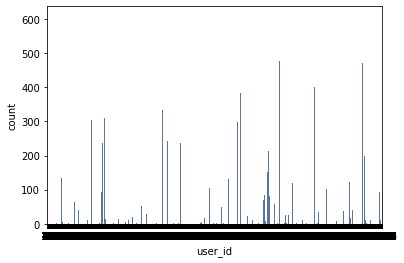

In [119]:
sns.countplot(df_usersEng['user_id'], order=sorted(df_usersEng['user_id'].unique()), color='#5975A4', saturation=1)

In [120]:
#Visited

In [121]:
print_stats(df_usersEng, 'visited', False)

------------------------------------------------------------ 
 Individual Summary Statistics for visited 
 ------------------------------------------------------------
Describe 
 count    207917.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: visited, dtype: float64 
 --------------------
Sample Observations 
 48976     1
113250    1
40429     1
41790     1
10649     1
Name: visited, dtype: int64 
 --------------------
Number of Uniques 
 1 
 --------------------
Unique value counts 
 1    207917
Name: visited, dtype: int64 
 --------------------


In [122]:
#There seems to be only one value in the while column '1'
#So we have no use of this column, so we could drop it

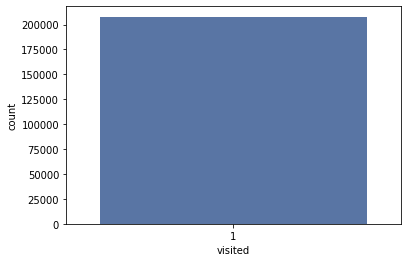

In [123]:
sns.countplot(df_usersEng['visited'], order=sorted(df_usersEng['visited'].unique()), color='#5975A4', saturation=1)

In [124]:
#time_stamp

In [125]:
print_stats(df_usersEng, 'time_stamp', False)

------------------------------------------------------------ 
 Individual Summary Statistics for time_stamp 
 ------------------------------------------------------------
Describe 
 count                  207917
unique                 207220
top       2013-11-05 21:21:37
freq                        2
Name: time_stamp, dtype: object 
 --------------------
Sample Observations 
 15726     2013-10-29 09:31:58
127753    2014-05-13 19:17:15
185648    2013-09-30 00:13:19
84995     2012-08-17 16:50:03
37968     2013-03-27 16:02:39
Name: time_stamp, dtype: object 
 --------------------
Number of Uniques 
 207220 
 --------------------


In [126]:

df_usersEng['time_stamp'] = pd.to_datetime(df_usersEng['time_stamp'])

In [127]:
df_usersEng.time_stamp.describe()

count                  207917
unique                 207220
top       2014-02-05 03:09:54
freq                        2
first     2012-05-31 08:20:06
last      2014-06-06 14:58:50
Name: time_stamp, dtype: object

In [128]:
#there are some users who have logged in only once,
#users that logged atleast 3 times or more in 7 days period will have adaptability set as 1 and 
#users logged in less than 3 times will have adaptability set as 0

In [129]:
len(df_usersEng.groupby('user_id')['time_stamp'].count()<3)

8823

In [130]:
df_usersEng.sort_values(['user_id', 'time_stamp'],ascending=True).groupby('user_id')

In [131]:
df_usersEng[df_usersEng.user_id ==2].sort_values(['user_id', 'time_stamp'],ascending=True).groupby('user_id')['time_stamp']

                                                                                                    

In [132]:
temp = df_usersEng[df_usersEng.user_id ==2].sort_values('time_stamp')

In [133]:
from datetime import datetime
from datetime import timedelta

In [134]:
seven = timedelta(7)
df_users['adopted_user'] =0
df_users.index = df_users['object_id']

In [135]:
#for row in df_usersEng.sort_values(['user_id', 'time_stamp'],ascending=True).groupby('user_id').itertuples():
#we will traverse the data frame one user at a time
for user in df_usersEng['user_id'].unique():
    #userIter = df_usersEng[df_usersEng.user_id ==2].sort_values(['user_id', 'time_stamp'],ascending=True).groupby('user_id')
    userIter = df_usersEng[df_usersEng.user_id ==user].sort_values('time_stamp')
    for row in userIter.itertuples():
        #check time_stamp of this row against all the rest of the rows for this user_id
        today = row.time_stamp
        todayplusseven = today+seven
        if len(userIter[~((userIter.time_stamp>=today) & (userIter.time_stamp<= todayplusseven ))]) >=3:
            #df_users[df_users.object_id ==user]['adopted_user'] =1
            df_users.loc[user, 'adopted_user'] =1
            #print('\nval', user, len(userIter[~((userIter.time_stamp>=today) & (userIter.time_stamp<= todayplusseven ))]), len(userIter))
            break
    
            

In [136]:
df_users['adopted_user'].unique()

array([0, 1])

In [137]:
#let's check if the values are set for adopted_user column
df_users.head(5).T

object_id,1,2,3,4,5
object_id,1,2,3,4,5
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28,2013-01-17 10:14:20
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas,Raw Grace
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com,GraceRaw@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE,GUEST_INVITE
last_session_creation_time,1.39814e+09,1.39624e+09,1.36373e+09,1.36921e+09,1.35885e+09
opted_in_to_mailing_list,1,0,0,0,0
enabled_for_marketing_drip,0,0,0,0,0
org_id,11,1,94,1,193
adopted_user,0,1,0,0,0


In [138]:
#let's see how many users are adopted users percentage wise
print('percent of users who are considered adopated users = {:.2f}%'.format(len(df_users[df_users.adopted_user ==1])/len(df_users)*100))


percent of users who are considered adopated users = 16.73%


In [139]:

df_users['creation_source'] = df_users['creation_source'].astype(str)

In [140]:
print_stats(df_users, 'creation_source', True)

------------------------------------------------------------ 
 Individual Summary Statistics for creation_source 
 ------------------------------------------------------------
Describe 
 count          12000
unique             5
top       ORG_INVITE
freq            4254
Name: creation_source, dtype: object 
 --------------------
Sample Observations 
 object_id
6353      ORG_INVITE
8538      ORG_INVITE
1186    GUEST_INVITE
6541      ORG_INVITE
4789    GUEST_INVITE
Name: creation_source, dtype: object 
 --------------------
Number of Uniques 
 5 
 --------------------
Unique value counts 
 ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64 
 --------------------
Group_by 
              count unique         top  freq
adopted_user                               
0             9993      5  ORG_INVITE  3556
1             2007      5  ORG_INVITE   698 
 --------------------


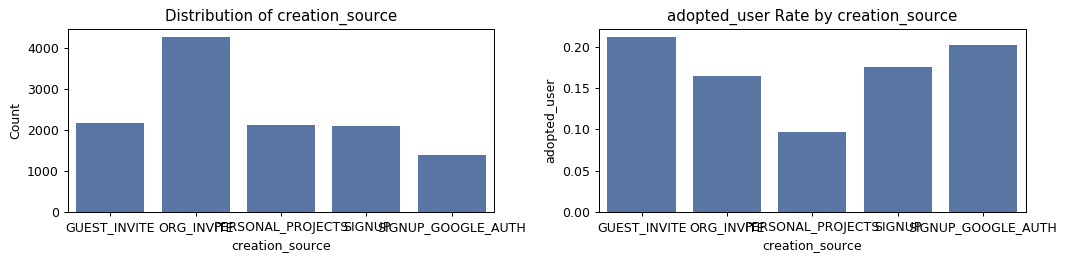

In [141]:
plot_var(df_users, 'creation_source', 'creation_source', False)

In [142]:
#it looks like there are 6 unique categories, we will use label encoder\
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_users['num_creation_source']= label_encoder.fit_transform(df_users['creation_source']) 

df_users['num_creation_source'].unique() 

array([0, 1, 3, 2, 4])

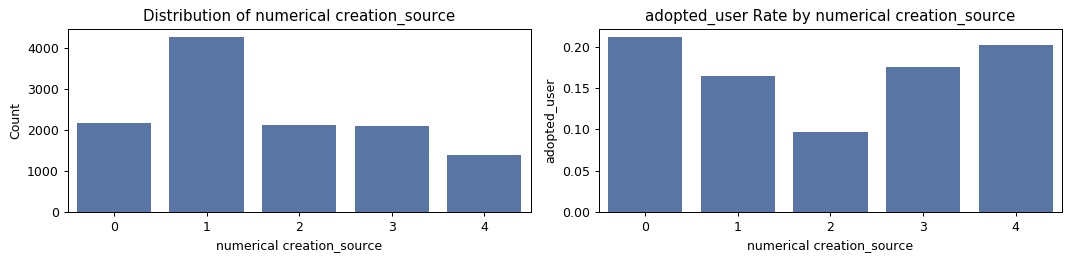

In [143]:
plot_var(df_users, 'num_creation_source', 'numerical creation_source', False)

In [144]:
print_stats(df_users, 'last_session_creation_time', False)

------------------------------------------------------------ 
 Individual Summary Statistics for last_session_creation_time 
 ------------------------------------------------------------
Describe 
 count    8.823000e+03
mean     1.379279e+09
std      1.953116e+07
min      1.338452e+09
25%      1.363195e+09
50%      1.382888e+09
75%      1.398443e+09
max      1.402067e+09
Name: last_session_creation_time, dtype: float64 
 --------------------
Sample Observations 
 object_id
3414             NaN
7431    1.401817e+09
620     1.363674e+09
4172    1.383819e+09
3508    1.401007e+09
Name: last_session_creation_time, dtype: float64 
 --------------------
Number of Uniques 
 8821 
 --------------------


In [145]:
#As we have already seen earlier, there are missing values, we will impute those
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['last_session_creation_time'].median())

In [146]:
df_users['last_session_creation_time'].isna().sum()
#no more missing values

0

In [147]:
#opted_in_to_mailing_list

In [148]:
print_stats(df_users, 'opted_in_to_mailing_list', False)

------------------------------------------------------------ 
 Individual Summary Statistics for opted_in_to_mailing_list 
 ------------------------------------------------------------
Describe 
 count    12000.000000
mean         0.249500
std          0.432742
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: opted_in_to_mailing_list, dtype: float64 
 --------------------
Sample Observations 
 object_id
2456     0
7690     0
10918    0
5077     1
3834     0
Name: opted_in_to_mailing_list, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64 
 --------------------


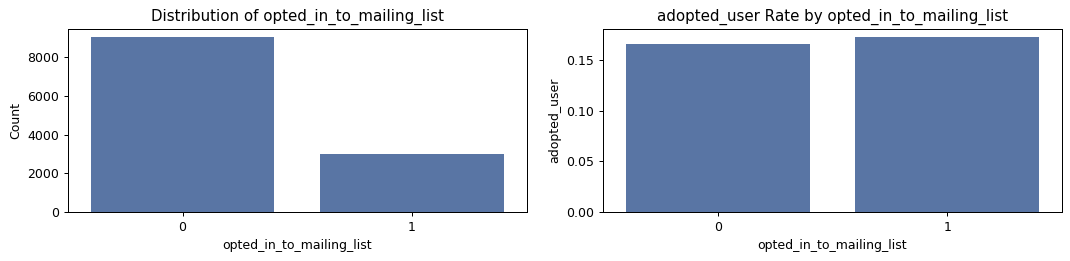

In [149]:
plot_var(df_users, 'opted_in_to_mailing_list', 'opted_in_to_mailing_list', False)

In [150]:
df_users.groupby('opted_in_to_mailing_list')['adopted_user'].value_counts(normalize=True)

opted_in_to_mailing_list  adopted_user
0                         0               0.834333
                          1               0.165667
1                         0               0.827989
                          1               0.172011
Name: adopted_user, dtype: float64

In [151]:
#df_users['last_session_creation_date'] = pd.to_datetime(df_users['last_session_creation_time'])
df_users.head(5).T

object_id,1,2,3,4,5
object_id,1,2,3,4,5
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52,2013-05-21 08:09:28,2013-01-17 10:14:20
name,Clausen August,Poole Matthew,Bottrill Mitchell,Clausen Nicklas,Raw Grace
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com,NicklasSClausen@yahoo.com,GraceRaw@yahoo.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE,GUEST_INVITE,GUEST_INVITE
last_session_creation_time,1.39814e+09,1.39624e+09,1.36373e+09,1.36921e+09,1.35885e+09
opted_in_to_mailing_list,1,0,0,0,0
enabled_for_marketing_drip,0,0,0,0,0
org_id,11,1,94,1,193
adopted_user,0,1,0,0,0


In [152]:
#enabled_for_marketing_drip

In [153]:
print_stats(df_users, 'enabled_for_marketing_drip', False)

------------------------------------------------------------ 
 Individual Summary Statistics for enabled_for_marketing_drip 
 ------------------------------------------------------------
Describe 
 count    12000.000000
mean         0.149333
std          0.356432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: enabled_for_marketing_drip, dtype: float64 
 --------------------
Sample Observations 
 object_id
4005    0
7624    0
7828    0
8432    1
9591    0
Name: enabled_for_marketing_drip, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64 
 --------------------


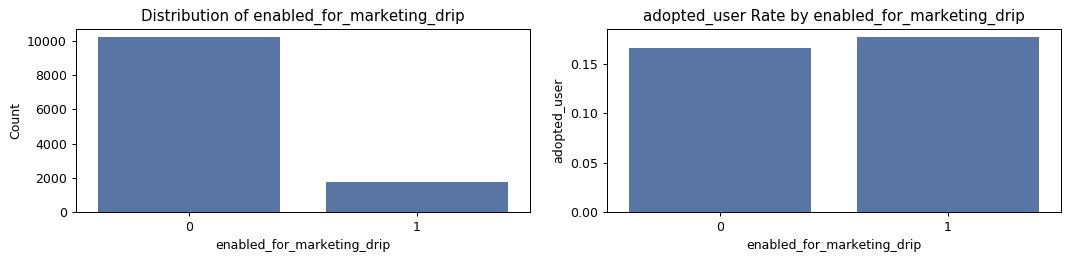

In [154]:
plot_var(df_users, 'enabled_for_marketing_drip', 'enabled_for_marketing_drip', False)

In [155]:
#org_id

In [156]:
print_stats(df_users, 'org_id', False)

------------------------------------------------------------ 
 Individual Summary Statistics for org_id 
 ------------------------------------------------------------
Describe 
 count    12000.000000
mean       141.884583
std        124.056723
min          0.000000
25%         29.000000
50%        108.000000
75%        238.250000
max        416.000000
Name: org_id, dtype: float64 
 --------------------
Sample Observations 
 object_id
6802    403
8137    375
2021      0
9239     38
370     414
Name: org_id, dtype: int64 
 --------------------
Number of Uniques 
 417 
 --------------------


In [157]:
#adopted_user - let's look at our target variable now

In [158]:
print_stats(df_users, 'adopted_user', False)

------------------------------------------------------------ 
 Individual Summary Statistics for adopted_user 
 ------------------------------------------------------------
Describe 
 count    12000.000000
mean         0.167250
std          0.373214
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: adopted_user, dtype: float64 
 --------------------
Sample Observations 
 object_id
876      0
10635    0
235      0
187      0
7115     0
Name: adopted_user, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 0    9993
1    2007
Name: adopted_user, dtype: int64 
 --------------------


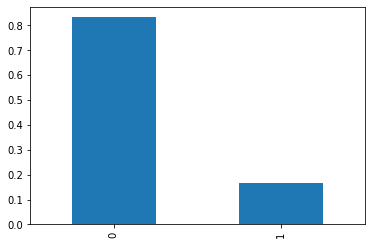

In [159]:
df_users['adopted_user'].value_counts(normalize=True).plot(kind='bar')

In [160]:
#As we see out target variable is highliy imbalanced in the proportion of 80/20

Pearson Correlation
================
We find Pearson correlation coefficients between pairs of features from our feature set. Correlation could be either positive or negative. We set the threshold of 0.3 and remove a feature where correlation coefficient > 0.3.

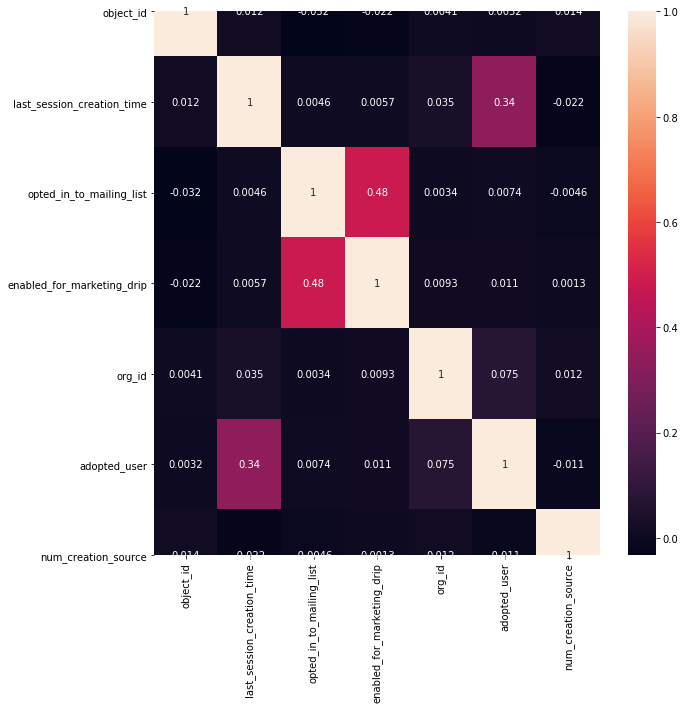

In [161]:

plt.figure(figsize=(10,10))
cor = df_users.corr()
sns.heatmap(cor, annot=True)

In [162]:
#we will drop 'enabled for marketing drip' column since the co-relation coeff is very high
df_users.drop('enabled_for_marketing_drip', axis =1, inplace=True)

In [163]:
df_users['creation_time']= pd.to_datetime(df_users['creation_time'])

In [164]:
df_users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
org_id                                 int64
adopted_user                           int64
num_creation_source                    int64
dtype: object

In [165]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,org_id,adopted_user,num_creation_source
object_id,,,,,,,,,,
1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,11,0,0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,1,1,1
3,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,94,0,1
4,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,1,0,0
5,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,193,0,0


In [166]:
df_users.drop(['name', 'email', 'creation_source', 'creation_time'], axis=1, inplace=True)


In [167]:
df_users = df_users.dropna()

In [168]:
X = df_users.drop('adopted_user', axis=1)
y = df_users['adopted_user']

In [169]:
print(df_users.shape)
print(X.shape)
print(y.shape)

(12000, 6)
(12000, 5)
(12000,)


In [170]:
#Our dataset is ready. Let's move onto test train split.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=2, stratify=df_users['adopted_user'])


In [171]:
X_train.head()

,object_id,last_session_creation_time,opted_in_to_mailing_list,org_id,num_creation_source
object_id,,,,,
622,622,1.382888e+09,1,30,2
8521,8521,1.376612e+09,1,60,1
11045,11045,1.386087e+09,0,156,0
2428,2428,1.400183e+09,0,359,1
780,780,1.364800e+09,0,3,2


Over sampling: This method uses synthetic data generation to increase the number of samples in the data set.
There are two ways
1. SMOTE- Synthetic Minority Oversampling Technique,
2. ADASYN- Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

In [172]:

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_sample(X_train, y_train)


In [173]:
y_train.value_counts()

0    6995
1    1405
Name: adopted_user, dtype: int64

In [174]:
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.

    
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)

In [175]:
_assert_all_finite(X_train)

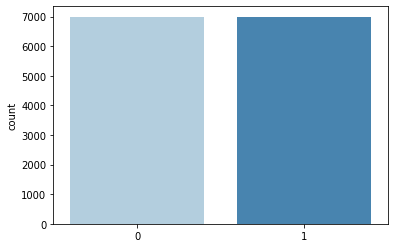

In [176]:
#lets see how well oversampling worked
sns.countplot(y_oversampled, palette='Blues')

#SGD
====

In [177]:
#The machine learning pipeline loss='log' for logistics model
pipeline_sgdlogreg = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [178]:
#grid of hyperparameters to search over
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1]
}



#Create the search grid object
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)
#Conduct the grid search and train the final model on the whole dataset
grid_sgdlogreg.fit(X_oversampled.astype(float), y_oversampled)

#Mean cross-validated score of the best model
grid_sgdlogreg.best_score_

#Best hyperparameters
grid_sgdlogreg.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished


{'model__alpha': 0.01}

In [179]:
# Predict the labels of the test set: y_pred
y_pred = grid_sgdlogreg.predict(X_test)

# Compute and print metrics
print("Accuracy score on training set:", grid_sgdlogreg.best_score_)
print("Accuracy score on test dataset: {}".format(grid_sgdlogreg.score(X_test, y_test)))
print(metrics.classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(grid_sgdlogreg.best_params_))

Accuracy score on training set: 0.80187277648029
Accuracy score on test dataset: 0.7976408414025741
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      2998
           1       0.36      0.77      0.49       602

   micro avg       0.73      0.73      0.73      3600
   macro avg       0.65      0.75      0.66      3600
weighted avg       0.84      0.73      0.76      3600

Tuned Model Parameters: {'model__alpha': 0.01}


In [180]:
gbm = GradientBoostingClassifier(verbose=True)
gbm.fit(X_train, y_train)
print('Train Score:', round(gbm.score(X_oversampled,y_oversampled),3))
print('Test Score:', round(gbm.score(X_test,y_test),3))

      Iter       Train Loss   Remaining Time 
         1           0.8198            1.30s
         2           0.7659            0.88s
         3           0.7260            0.75s
         4           0.6960            0.70s
         5           0.6717            0.65s
         6           0.6521            0.62s
         7           0.6359            0.59s
         8           0.6204            0.56s
         9           0.6076            0.55s
        10           0.5961            0.53s
        20           0.5410            0.42s
        30           0.5225            0.35s
        40           0.5089            0.30s
        50           0.4996            0.25s
        60           0.4926            0.19s
        70           0.4875            0.14s
        80           0.4808            0.09s
        90           0.4756            0.05s
       100           0.4717            0.00s
Train Score: 0.788
Test Score: 0.898


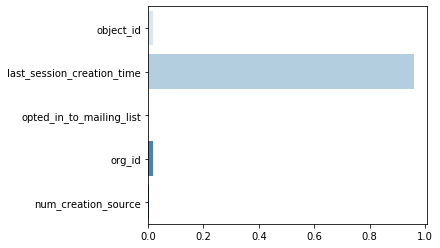

In [182]:
#check feature importance
plt.figure(figsize=(5,4))
sns.barplot(y=X.columns, x=gbm.feature_importances_, palette='Blues')

Conclusion
==========
As we can see from above, last_session_creation_time is most importance feature. So the last time when user logged in the system highly affect the future adopted prediction. That makes sense, since the most recent the user has logged into the system, more the probability the user will remain active. There are aorund 30% users who have signed up but never logged in. Going forward if there are more attributes available around user profile or the way user was directed to the system, that might be helpful in predicting.